In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
from backtest import backtest
from concentrated_backtest import concentrated_backtest
from data_cleaning_utils import get_eth_df
from collateral_utils import get_tricrypto_collateral_df, get_gmx_collateral_df

In [3]:
from uni_v3_utils import calculate_univ3_liquidity, calculate_usd_in_range, calculate_eth_in_range, calculate_position_changes

In [4]:
sns.set_style('whitegrid')
sns.set_context('notebook')
colors = sns.color_palette("bright")

### Vault Performance Backtest

In [5]:
def get_collateral_df(eth_df, collateral):
    if collateral == 'TriCrypto':
        return get_tricrypto_collateral_df(eth_df)
    elif collateral == 'GMX':
        return get_gmx_collateral_df(eth_df)

In [6]:
def get_backtest_and_reset_dfs(start_date, end_date, collateral='TriCrypto', collateral_apy=8.5,
                               arb_threshold=0.2, percent_collateral_deployed=20, liquidity_concentration=1, 
                               reset_threshold=0.2, window_size=60*24):
    """ backtest and get graphing values """
    eth_df = get_eth_df()  # gets historical eth price data
    eth_df = eth_df.loc[(eth_df['time'] >= start_date) & (eth_df['time'] < end_date)].reset_index(drop=True)
    collateral_df = get_collateral_df(eth_df, collateral)  # gets historical collateral price data
    df = backtest(eth_df, collateral_df, collateral_apy=collateral_apy, arb_threshold=arb_threshold, 
                  percent_collateral_deployed=percent_collateral_deployed, liquidity_concentration=liquidity_concentration,
                  reset_threshold=reset_threshold, window_size=window_size) # get pnl from strategy backtest
    
    resets = df.loc[df['reset_triggered'], ['time']].reset_index(drop=True)  # reset points for graphing
    resets['time'] += timedelta(minutes=window_size)
    resets = resets.merge(df[['time', 'collateral_value']])
    
    initial_collateral_value = df.loc[0, 'collateral_value']  # calculates uni v2 value
    initial_price = df.loc[0, 'current_price']
    df['uniswap_v2_value'] = initial_collateral_value * (df['current_price'] / initial_price)**(1/2)
    
    return df, resets

### 3 Year Backtest Results

In [5]:
backtest_df, reset_df = get_backtest_and_reset_dfs('2019-01-01', '2022-01-01', collateral_apy=8.5)

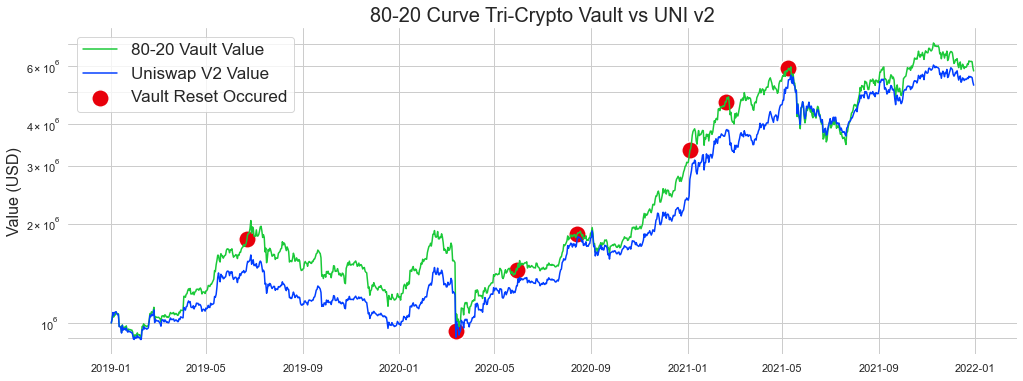

In [6]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='collateral_value', data=backtest_df, ax=ax, color=colors[2])
sns.lineplot(x='time', y='uniswap_v2_value', data=backtest_df, ax=ax, color=colors[0])
sns.scatterplot(x='time', y='collateral_value', data = reset_df, ax=ax, color=colors[3], s=300)
ax.legend(['80-20 Vault Value', 'Uniswap V2 Value', 'Vault Reset Occured'], fontsize=17)
ax.grid(True, which="both")
ax.set_yscale("log")
ax.set_xlabel('')
ax.set_ylabel('Value (USD)', fontsize=16)
ax.set_title('80-20 Curve Tri-Crypto Vault vs UNI v2', fontsize=20)
plt.savefig('./graphs/three_year_backtest.png', format='png')
plt.show()

### Bullish Market Conditions

In [7]:
backtest_df, reset_df = get_backtest_and_reset_dfs('2020-08-01', '2021-01-01', collateral_apy=8.5)

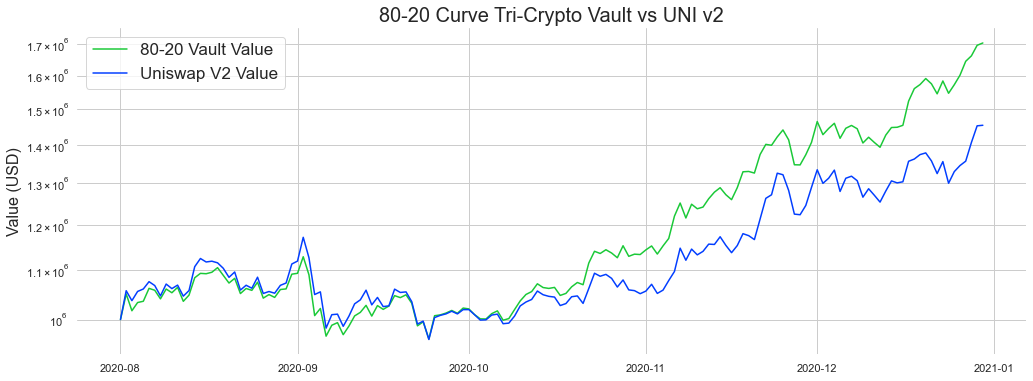

In [8]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='collateral_value', data=backtest_df, ax=ax, color=colors[2])
sns.lineplot(x='time', y='uniswap_v2_value', data=backtest_df, ax=ax, color=colors[0])
sns.scatterplot(x='time', y='collateral_value', data = reset_df, ax=ax, color=colors[3], s=300)
ax.legend(['80-20 Vault Value', 'Uniswap V2 Value', 'Vault Reset Occured'], fontsize=17)
ax.grid(True, which="both")
ax.ticklabel_format(axis='y',style='plain')
ax.set_yscale("log")
ax.set_xlabel('')
ax.set_ylabel('Value (USD)', fontsize=16)
ax.set_title('80-20 Curve Tri-Crypto Vault vs UNI v2', fontsize=20)
plt.savefig('./graphs/bullish_backtest.png', format='png')
plt.show()

### Bearish Market Conditions

In [9]:
backtest_df, reset_df = get_backtest_and_reset_dfs('2020-02-01', '2020-05-01', collateral_apy=8.5)

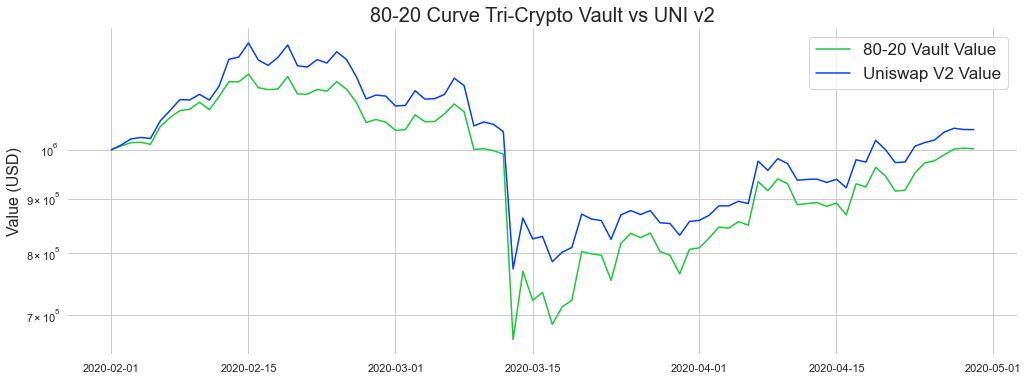

In [10]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='collateral_value', data=backtest_df, ax=ax, color=colors[2])
sns.lineplot(x='time', y='uniswap_v2_value', data=backtest_df, ax=ax, color=colors[0])
sns.scatterplot(x='time', y='collateral_value', data = reset_df, ax=ax, color=colors[3], s=300)
ax.legend(['80-20 Vault Value', 'Uniswap V2 Value', 'Vault Reset Occured'], fontsize=17)
ax.grid(True, which="both")
ax.ticklabel_format(axis='y',style='plain')
ax.set_yscale("log")
ax.set_xlabel('')
ax.set_ylabel('Value (USD)', fontsize=16)
ax.set_title('80-20 Curve Tri-Crypto Vault vs UNI v2', fontsize=20)
plt.savefig('./graphs/bearish_backtest.png', format='png')
plt.show()

### Crab Market Conditions

In [11]:
backtest_df, reset_df = get_backtest_and_reset_dfs('2021-09-01', '2021-11-01', collateral_apy=8.5)

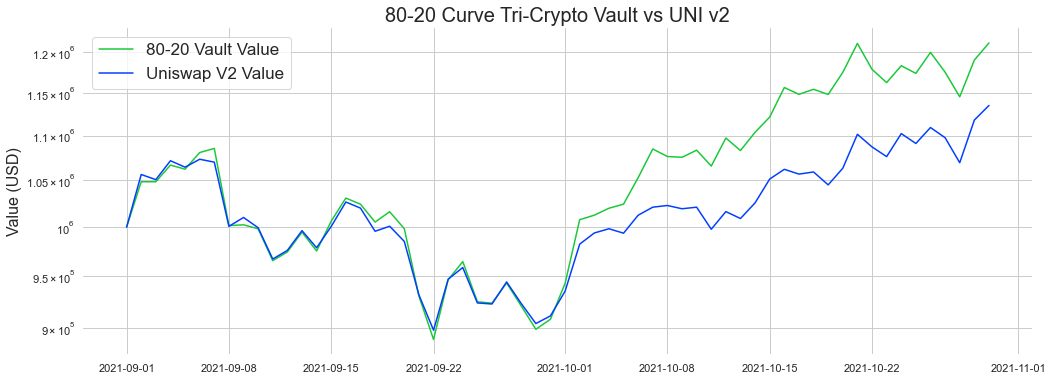

In [12]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='collateral_value', data=backtest_df, ax=ax, color=colors[2])
sns.lineplot(x='time', y='uniswap_v2_value', data=backtest_df, ax=ax, color=colors[0])
sns.scatterplot(x='time', y='collateral_value', data = reset_df, ax=ax, color=colors[3], s=300)
ax.legend(['80-20 Vault Value', 'Uniswap V2 Value', 'Vault Reset Occured'], fontsize=17)
ax.grid(True, which="both")
ax.ticklabel_format(axis='y',style='plain')
ax.set_yscale("log")
ax.set_xlabel('')
ax.set_ylabel('Value (USD)', fontsize=16)
ax.set_title('80-20 Curve Tri-Crypto Vault vs UNI v2', fontsize=20)
plt.savefig('./graphs/crab_backtest.png', format='png')
plt.show()

### Out of Bounds Risk

In [13]:
eth_df = get_eth_df()

In [14]:
collateral_df = get_tricrypto_collateral_df(eth_df)

In [15]:
df = backtest(eth_df, collateral_df, collateral_apy=8.5, arb_threshold=0.2)

In [16]:
resets = df.loc[df['reset_triggered'], ['time']].reset_index(drop=True)
resets['time'] += timedelta(days=1)
resets = resets.merge(df[['time', 'collateral_value']])

In [17]:
# want to show the price vs the lp bounds
start_date = '2019-01-01'
end_date = '2022-01-01'
price_subset = eth_df.loc[(eth_df['time'] >= start_date) & (eth_df['time'] < end_date)].reset_index(drop=True)
backtest_subset = df.loc[(df['time'] >= start_date) & (df['time'] < end_date)].reset_index(drop=True)

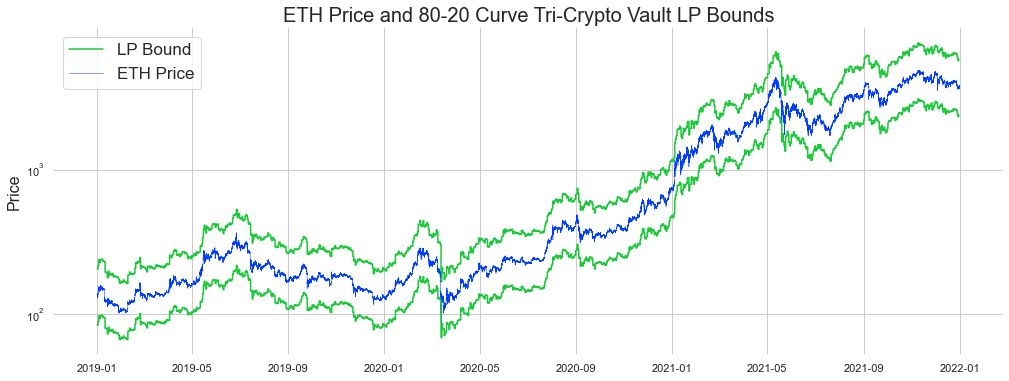

In [18]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='upper_tick', data=backtest_subset, ax=ax, drawstyle='steps-post', color=colors[2])
sns.lineplot(x='time', y='price', data=price_subset, ax=ax, color=colors[0], linewidth=0.5)
sns.lineplot(x='time', y='lower_tick', data=backtest_subset, ax=ax, drawstyle='steps-post', color=colors[2])
ax.legend(['LP Bound', 'ETH Price'], fontsize=17)
ax.set_yscale("log")
# ax.grid(True, which="both")
ax.set_xlabel('')
ax.set_ylabel('Price', fontsize=16)
ax.set_title('ETH Price and 80-20 Curve Tri-Crypto Vault LP Bounds', fontsize=20)
plt.savefig('./graphs/lp_bounds_backtest.png', format='png')
plt.show()

In [19]:
# want to show the price vs the lp bounds
start_date = '2020-03-02'
end_date = '2020-04-01'
price_subset = eth_df.loc[(eth_df['time'] >= start_date) & (eth_df['time'] < end_date)].reset_index(drop=True)
backtest_subset = df.loc[(df['time'] >= start_date) & (df['time'] < end_date)].reset_index(drop=True)

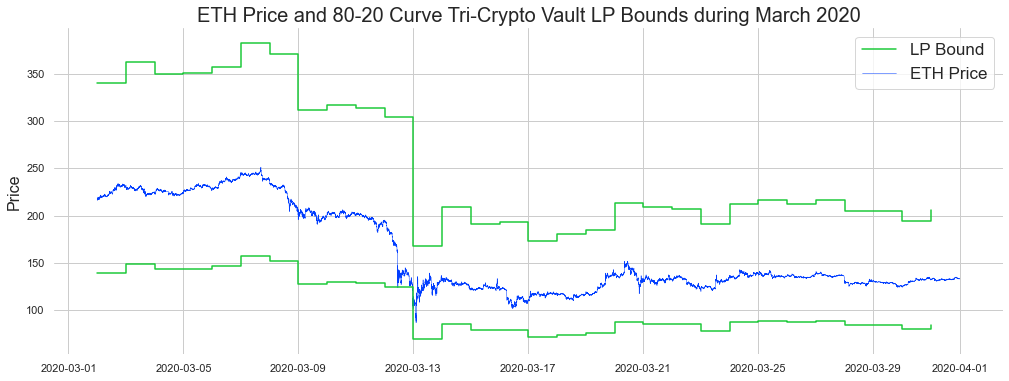

In [20]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='upper_tick', data=backtest_subset, ax=ax, drawstyle='steps-post', color=colors[2])
sns.lineplot(x='time', y='price', data=price_subset, ax=ax, color=colors[0], linewidth=0.5)
sns.lineplot(x='time', y='lower_tick', data=backtest_subset, ax=ax, drawstyle='steps-post', color=colors[2])
ax.legend(['LP Bound', 'ETH Price'], fontsize=17)
ax.set_xlabel('')
ax.set_ylabel('Price', fontsize=16)
ax.set_title('ETH Price and 80-20 Curve Tri-Crypto Vault LP Bounds during March 2020', fontsize=20)
plt.savefig('./graphs/lp_bounds_march_2020.png', format='png')
plt.show()

In [44]:
## GMX 
backtest_df, reset_df = get_backtest_and_reset_dfs('2019-01-01', '2022-01-01', collateral='GMX', collateral_apy=8.5,
                                                   arb_threshold=0.15, percent_collateral_deployed=20, liquidity_concentration=1,
                                                   reset_threshold=0.2, window_size=60*24)

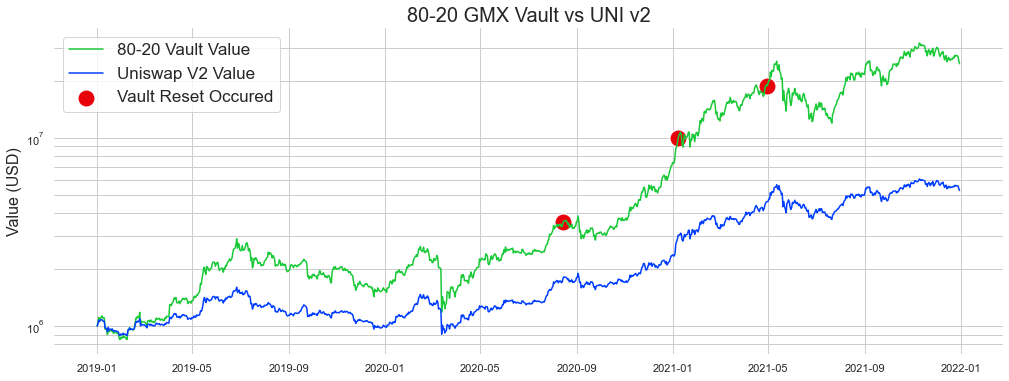

In [45]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='collateral_value', data=backtest_df, ax=ax, color=colors[2])
sns.lineplot(x='time', y='uniswap_v2_value', data=backtest_df, ax=ax, color=colors[0])
sns.scatterplot(x='time', y='collateral_value', data = reset_df, ax=ax, color=colors[3], s=300)
ax.legend(['80-20 Vault Value', 'Uniswap V2 Value', 'Vault Reset Occured'], fontsize=17)
ax.grid(True, which="both")
ax.set_yscale("log")
ax.set_xlabel('')
ax.set_ylabel('Value (USD)', fontsize=16)
ax.set_title('80-20 GMX Vault vs UNI v2', fontsize=20)
plt.savefig('./graphs/gmx_three_year_backtest.png', format='png')
plt.show()

In [47]:
int(backtest_df['fees_collected'].sum())

1753830

In [7]:
start_date = '2019-01-01'
end_date = '2022-01-01'

In [23]:
## GMX 
backtest_df, reset_df = get_backtest_and_reset_dfs(start_date, end_date, collateral='GMX', collateral_apy=8.5,
                                                   arb_threshold=0.15, percent_collateral_deployed=20, liquidity_concentration=1,
                                                   reset_threshold=0.2, window_size=60*24)

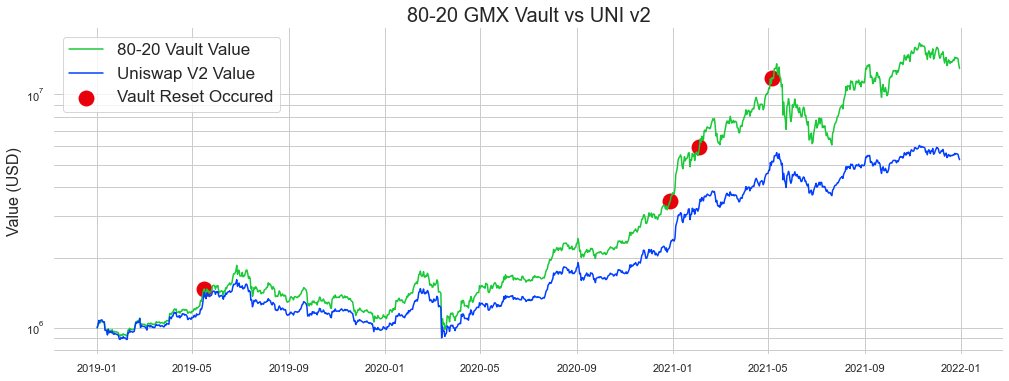

In [24]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='collateral_value', data=backtest_df, ax=ax, color=colors[2])
sns.lineplot(x='time', y='uniswap_v2_value', data=backtest_df, ax=ax, color=colors[0])
sns.scatterplot(x='time', y='collateral_value', data = reset_df, ax=ax, color=colors[3], s=300)
ax.legend(['80-20 Vault Value', 'Uniswap V2 Value', 'Vault Reset Occured'], fontsize=17)
ax.grid(True, which="both")
ax.set_yscale("log")
ax.set_xlabel('')
ax.set_ylabel('Value (USD)', fontsize=16)
ax.set_title('80-20 GMX Vault vs UNI v2', fontsize=20)
# plt.savefig('./graphs/gmx_three_year_backtest.png', format='png')
plt.show()

In [19]:
backtest_df.head()

,time,current_price,future_price,collateral_value,liquidity,lower_tick,upper_tick,eth_deployed,usd_deployed,lp_eth_position,lp_usd_balance,fees_collected,reset_triggered,lp_pnl,lp_pnl_change,uniswap_v2_value
0,2019-01-01,131.45,139.10,1.000000e+06,43610.363752,84.1280,205.390625,760.745531,100000.000000,0.000000,0.000000,165.971640,False,-245.501587,-245.501587,1.000000e+06
1,2019-01-02,139.10,152.01,1.024022e+06,43610.363752,89.0240,217.343750,739.530585,102868.704332,-106.074730,14509.493300,290.331448,False,-2383.617425,-2138.115838,1.028687e+06
2,2019-01-03,152.01,146.30,1.059458e+06,43610.363752,97.2864,237.515625,707.430248,107536.472003,-266.576413,38138.663106,220.241745,False,-834.540372,1549.077053,1.075365e+06
3,2019-01-04,146.30,152.08,1.042706e+06,43610.363752,93.6320,228.593750,721.103397,105497.427044,-198.210666,28163.680055,251.652999,False,-1930.411527,-1095.871155,1.054974e+06
4,2019-01-05,152.08,152.83,1.058417e+06,43610.363752,97.3312,237.625000,707.267420,107561.229212,-267.390554,38734.343894,264.600660,False,-1869.615717,60.795810,1.075612e+06


In [22]:
43610.363752 * 2

87220.727504

In [21]:
backtest_df.head()

,time,current_price,future_price,collateral_value,liquidity,lower_tick,upper_tick,eth_deployed,usd_deployed,lp_eth_position,lp_usd_balance,fees_collected,reset_triggered,lp_pnl,lp_pnl_change,uniswap_v2_value
0,2019-01-01,131.45,139.10,1.000000e+06,87220.727503,106.4745,162.283951,760.745531,100000.000000,0.000000,0.000000,331.943280,False,-491.003174,-491.003174,1.000000e+06
1,2019-01-02,139.10,152.01,1.023776e+06,87220.727503,112.6710,171.728395,739.530585,102868.704332,-212.149459,29018.986599,580.662896,False,-4767.234849,-4276.231676,1.028687e+06
2,2019-01-03,152.01,146.30,1.057065e+06,87220.727503,123.1281,187.666667,707.430248,107536.472003,-533.152826,76277.326211,440.483490,False,-1669.080744,3098.154106,1.075365e+06
3,2019-01-04,146.30,152.08,1.041903e+06,87220.727503,118.5030,180.617284,721.103397,105497.427044,-396.421332,56327.360110,503.305999,False,-3860.823055,-2191.742311,1.054974e+06
4,2019-01-05,152.08,152.83,1.056506e+06,87220.727503,123.1848,187.753086,707.267420,107561.229212,-534.781108,77468.687789,529.201320,False,-3739.231434,121.591621,1.075612e+06


In [10]:
## GMX 
backtest_df, reset_df = get_backtest_and_reset_dfs(start_date, end_date, collateral='GMX', collateral_apy=8.5,
                                                   arb_threshold=0.2, percent_collateral_deployed=40, liquidity_concentration=4,
                                                   reset_threshold=0.2, window_size=60*12)

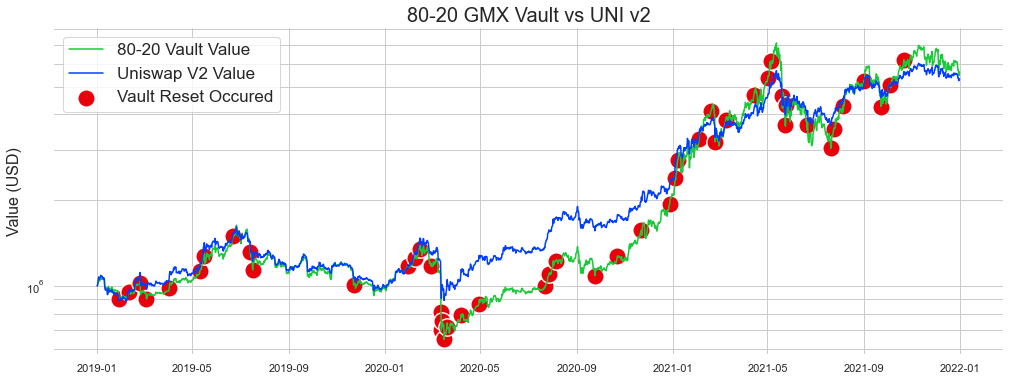

In [11]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='collateral_value', data=backtest_df, ax=ax, color=colors[2])
sns.lineplot(x='time', y='uniswap_v2_value', data=backtest_df, ax=ax, color=colors[0])
sns.scatterplot(x='time', y='collateral_value', data = reset_df, ax=ax, color=colors[3], s=300)
ax.legend(['80-20 Vault Value', 'Uniswap V2 Value', 'Vault Reset Occured'], fontsize=17)
ax.grid(True, which="both")
ax.set_yscale("log")
ax.set_xlabel('')
ax.set_ylabel('Value (USD)', fontsize=16)
ax.set_title('80-20 GMX Vault vs UNI v2', fontsize=20)
# plt.savefig('./graphs/gmx_three_year_backtest.png', format='png')
plt.show()